## Computational Theory Problems | Nathan Buyrchiyev

In [136]:
import numpy as np
import math

## Problem 1: Binary Words and Operations

### Problem to Solve:
Implement the following functions in Python. Use numpy to ensure that all variables and values are treated as 32-bit integers. These functions are defined in the Secure Hash Standard (see page 10).

    Parity(x, y, z)
    Ch(x, y, z)
    Maj(x, y, z)
    Sigma0(x) - written as Σ 0 256 ( x ) in the standard.
    Sigma1(x) - written as Σ 1 256 ( x ) in the standard.
    sigma0(x) - written as σ 0 256 ( x ) in the standard.
    sigma1(x) - written as σ 1 256 ( x ) in the standard.

Document each function with a clear docstring, explain its purpose and behaviour in Markdown, and test it with appropriate examples to verify correctness.

### Introduction
In the Secure Hash Standard (SHA), all operations are performed on fixed-size *binary words* (typically 32 bits for SHA-256).  
Each function defined in the standard—such as **Parity**, **Ch**, **Maj**, and **Σ (Sigma)**—relies heavily on **bitwise logical operations**.  
This section explains these core concepts, which will be reused throughout the notebook.

---


Bitwise operations act directly on the binary representation of integers.  
For example, the 8-bit numbers `x = 0b10101010` and `y = 0b11001100` can be combined using bitwise logic.

To ensure consistent 32-bit arithmetic (like in the official SHA-256 algorithm),  
we use **NumPy’s unsigned 32-bit integer type**:

```python
x = np.uint32(0b10101010)

---


### Section 1.1 Parity

The parity function is a simple bitwise operation that shows up in some cryptographic hash functions like SHA-1.
It takes three 32-bit values (x, y, and z) and compares their bits one by one.
For each bit position, it returns 1 if an odd number of the bits are 1 — and 0 otherwise.

So basically, it’s checking whether the number of 1s across the three inputs is odd.
That’s why it’s called a “parity” function — it’s about whether the bits have even or odd parity.

In math form, it’s written as:

$$
\text{Parity}(x, y, z) = x \oplus y \oplus z
$$

where ⊕ represents the **bitwise XOR** operation.

The ⊕ symbol just means XOR (exclusive OR). XOR itself already behaves like a parity check:

If you XOR two bits and both are the same (0⊕0 or 1⊕1), you get 0.

If they’re different (0⊕1 or 1⊕0), you get 1.

So when you extend that to three inputs, XOR effectively gives you 1 whenever an odd number of bits are set.

In hash functions, this kind of operation helps mix bits together — it’s good for diffusion, meaning that flipping even one input bit can completely change the output. It also adds a bit of non-linearity, which makes the function harder to reverse-engineer.

I’m using NumPy’s 32-bit unsigned integer type (np.uint32) here so that it behaves more like a low-level operation, similar to how it would in C or in an actual hash algorithm implementation.

This implementation mirrors how the **Parity** function is defined in Section 4.1.1 in the Secure Hash Standard [(FIPS PUB 180-4)](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf).

In [137]:
def parity(x, y, z):
    """
    Calculates the bitwise XOR of three 32-bit unsigned integers.

    This function takes three numbers, converts them to 32-bit unsigned
    integers, and then computes their bitwise XOR. This operation is
    equivalent to calculating the parity for each bit position across
    the three numbers.

    Args:
        x: The first integer.
        y: The second integer.
        z: The third integer.

    Returns:
        A 32-bit unsigned integer representing the bitwise XOR of x, y, and z.
    """
    x = np.uint32(x)
    y = np.uint32(y)
    z = np.uint32(z)
    
    return x ^ y ^ z

In [138]:

print("--- Basic Tests ---")
# 1 (01) ^ 2 (10) = 3 (11). 3 (11) ^ 3 (11) = 0 (00). Expected: 0x0
test_1 = parity(1, 2, 3) 
print(f"Parity(1, 2, 3) = {hex(test_1)}")

# 0 ^ 0 = 0. 0 ^ 0 = 0. Expected: 0x0
test_2 = parity(0, 0, 0)
print(f"Parity(0, 0, 0) = {hex(test_2)}")

print("\n--- Same Value Tests ---")
# 5 ^ 5 = 0. 0 ^ 5 = 5. Expected: 0x5
test_3 = parity(5, 5, 5)
print(f"Parity(5, 5, 5) = {hex(test_3)}")

# The two 10s cancel out. 10 ^ 10 = 0. 0 ^ 20 = 20. Expected: 0x14
test_4 = parity(10, 20, 10)
print(f"Parity(10, 20, 10) = {hex(test_4)}")

print("\n--- Hash-like Value Tests ---")
# Using large integers that resemble hash values
val_1 = 0xdeadbeef
val_2 = 0xbadf00d
val_3 = 0x12345678
test_5 = parity(val_1, val_2, val_3)
print(f"Parity({hex(val_1)}, {hex(val_2)}, {hex(val_3)}) = {hex(test_5)}")

# Using Python's hash() function, mask to 32 bits to avoid OverflowError
h1 = hash("hello") & 0xFFFFFFFF
h2 = hash("world") & 0xFFFFFFFF
h3 = hash("parity") & 0xFFFFFFFF
test_6 = parity(h1, h2, h3)
print(f"Parity(hash('hello'), hash('world'), hash('parity')) = {hex(test_6)}")

print("\n--- Binary Value Tests ---")
# Using binary literals
# 0b101 (5) ^ 0b010 (2) = 0b111 (7). 0b111 (7) ^ 0b111 (7) = 0. Expected: 0x0
test_7 = parity(0b101, 0b010, 0b111)
print(f"Parity(0b101, 0b010, 0b111) = {hex(test_7)}")

# 1 ^ 1 = 0. 0 ^ 0 = 0. Expected: 0x0
test_8 = parity(1, 1, 0)
print(f"Parity(1, 1, 0) = {hex(test_8)}")

--- Basic Tests ---
Parity(1, 2, 3) = 0x0
Parity(0, 0, 0) = 0x0

--- Same Value Tests ---
Parity(5, 5, 5) = 0x5
Parity(10, 20, 10) = 0x14

--- Hash-like Value Tests ---
Parity(0xdeadbeef, 0xbadf00d, 0x12345678) = 0xc734189a
Parity(hash('hello'), hash('world'), hash('parity')) = 0x5f5afe9c

--- Binary Value Tests ---
Parity(0b101, 0b010, 0b111) = 0x0
Parity(1, 1, 0) = 0x0


---

### Section 1.2 Ch Function
The choose function defined in Section 4.1.2, Equation (4.1) of the Secure Hash Standard, is another bitwise operation used in hash functions like SHA-1 and SHA-256.
It’s called “choose” because it literally chooses bits from one of two inputs — either y or z — based on the bits of x.

Here’s how it works:
For each bit position, if the bit in x is 1, the function takes the corresponding bit from y.
If the bit in x is 0, it takes the bit from z.

You can think of x as a “mask” that decides whether to pick from y or z.
In math form, it looks like this:

$$
\text{Ch}(x, y, z) = (x \land y) \oplus (\lnot x \land z)
$$

So for every bit:

When x = 1 → output comes from y

When x = 0 → output comes from z

This makes Ch kind of like a bitwise version of an if statement —
“if x then y else z.”

It’s a simple but powerful operation because it introduces conditional mixing into the hash function.
That’s great for non-linearity, helping make the overall hash much harder to predict or reverse.

I’m using np.uint32 again so the bitwise operations behave like proper 32-bit integer logic, just like in the actual Secure Hash Standard.

In [139]:
def ch(x, y, z):
    """
    Implements the 'choose' (Ch) function as defined in the Secure Hash Standard.

    This function selects bits from two 32-bit unsigned integers (y and z)
    based on the bits of a third integer (x). For each bit position:
        - If the corresponding bit in x is 1, the bit from y is chosen.
        - If the corresponding bit in x is 0, the bit from z is chosen.

    Mathematically, this can be expressed as:
        Ch(x, y, z) = (x AND y) XOR ((NOT x) AND z)

    Args:
        x: The control integer determining which bits to select.
        y: The integer providing bits where x has 1s.
        z: The integer providing bits where x has 0s.

    Returns:
        A 32-bit unsigned integer representing the result of Ch(x, y, z).
    """
    x = np.uint32(x)
    y = np.uint32(y)
    z = np.uint32(z)

    return (x & y) ^ (~x & z)


In [140]:
print("--- Basic Tests ---")
# For each bit: if x = 1, take y’s bit; if x = 0, take z’s bit.
# x = 1 (01), y = 2 (10), z = 3 (11)
# Bitwise: 01 → choose y’s bit (10) for lower bit, z’s bit (11) for upper bit → Expected: 0x2
test_1 = ch(1, 2, 3)
print(f"Ch(1, 2, 3) = {hex(test_1)}")

# If x = 0, we always choose z. Expected: z = 0x5
test_2 = ch(0, 10, 5)
print(f"Ch(0, 10, 5) = {hex(test_2)}")

# If x = all 1s, we always choose y. Expected: y = 0x9
test_3 = ch(0xFFFFFFFF, 9, 12)
print(f"Ch(0xFFFFFFFF, 9, 12) = {hex(test_3)}")

print("\n--- Same Value Tests ---")
# If y and z are the same, Ch always returns that value, no matter what x is.
# Expected: 0xA
test_4 = ch(7, 10, 10)
print(f"Ch(7, 10, 10) = {hex(test_4)}")

# If x alternates bits (0b1010) and y/z are opposites,
# result should pick alternating bits: 0b1010 from y=0b1111, z=0b0000 → Expected: 0b1010 (0xA)
test_5 = ch(0b1010, 0b1111, 0b0000)
print(f"Ch(0b1010, 0b1111, 0b0000) = {hex(test_5)}")

print("\n--- Hash-like Value Tests ---")
# Using large integers to simulate hash-like inputs
val_1 = 0xdeadbeef
val_2 = 0xbadf00d
val_3 = 0x12345678
test_6 = ch(val_1, val_2, val_3)
print(f"Ch({hex(val_1)}, {hex(val_2)}, {hex(val_3)}) = {hex(test_6)}")

# Using Python hash() masked to 32 bits
h1 = hash("choose") & 0xFFFFFFFF
h2 = hash("function") & 0xFFFFFFFF
h3 = hash("test") & 0xFFFFFFFF
test_7 = ch(h1, h2, h3)
print(f"Ch(hash('choose'), hash('function'), hash('test')) = {hex(test_7)}")

print("\n--- Binary Value Tests ---")
# x = 0b101, y = 0b111, z = 0b000 → picks bits from y when x=1 → Expected: 0b101 (0x5)
test_8 = ch(0b101, 0b111, 0b000)
print(f"Ch(0b101, 0b111, 0b000) = {hex(test_8)}")

# x = 0b010, y = 0b111, z = 0b000 → only middle bit from y → Expected: 0b010 (0x2)
test_9 = ch(0b010, 0b111, 0b000)
print(f"Ch(0b010, 0b111, 0b000) = {hex(test_9)}")


--- Basic Tests ---
Ch(1, 2, 3) = 0x2
Ch(0, 10, 5) = 0x5
Ch(0xFFFFFFFF, 9, 12) = 0x9

--- Same Value Tests ---
Ch(7, 10, 10) = 0xa
Ch(0b1010, 0b1111, 0b0000) = 0xa

--- Hash-like Value Tests ---
Ch(0xdeadbeef, 0xbadf00d, 0x12345678) = 0xabdf01d
Ch(hash('choose'), hash('function'), hash('test')) = 0xf20bd48

--- Binary Value Tests ---
Ch(0b101, 0b111, 0b000) = 0x5
Ch(0b010, 0b111, 0b000) = 0x2


---

### Section 1.3 Maj



The Majority (Maj) function, defined in Section 4.1.2, Equation (4.1) of the Secure Hash Standard, returns the majority bit from three 32-bit inputs (x, y, z) for each bit position.

If at least two of the bits are 1, the output bit is 1; otherwise, it is 0.
This can be viewed as a bitwise voting mechanism, where the majority value at each position determines the output.

Mathematically, the function is expressed as:

$$
\text{Maj}(x, y, z) = (x \land y) \oplus (x \land z) \oplus (y \land z)
$$

This operation promotes bit diffusion and stability in hash functions by combining three inputs in a balanced, non-linear way.

Implemented as defined in [FIPS, Section 4.1.1](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)

In [141]:
def Maj(x, y, z):
    """
    Computes the Majority (Maj) function used in SHA algorithms.

    For each bit position, the output is 1 if at least two of the bits
    among x, y, and z are 1.

    Formula:
        Maj(x, y, z) = (x & y) ^ (x & z) ^ (y & z)

    Parameters
    ----------
    x, y, z : int or np.uint32
        32-bit unsigned integers.

    Returns
    -------
    np.uint32
        The 32-bit result of the majority function.
    """
    x = np.uint32(x)
    y = np.uint32(y)
    z = np.uint32(z)

    return (x & y) ^ (x & z) ^ (y & z)


In [142]:
print("--- Basic Tests ---")
# Maj returns 1 for each bit position where at least 2 of the 3 inputs have 1
# x = 1 (01), y = 2 (10), z = 3 (11)
# Bit 0: x=1, y=0, z=1 → majority is 1
# Bit 1: x=0, y=1, z=1 → majority is 1
# Expected: 0x3 (11)
test_1 = Maj(1, 2, 3)
expected_1 = 0x3
print(f"Maj(1, 2, 3) - Expected: {hex(expected_1)}, Actual: {hex(test_1)}, {'PASS' if test_1 == expected_1 else 'FAIL'}")

# If all inputs are 0, result is 0
test_2 = Maj(0, 0, 0)
expected_2 = 0x0
print(f"Maj(0, 0, 0) - Expected: {hex(expected_2)}, Actual: {hex(test_2)}, {'PASS' if test_2 == expected_2 else 'FAIL'}")

# If all inputs are the same (all 1s), result is that value
test_3 = Maj(0xFFFFFFFF, 0xFFFFFFFF, 0xFFFFFFFF)
expected_3 = 0xFFFFFFFF
print(f"Maj(0xFFFFFFFF, 0xFFFFFFFF, 0xFFFFFFFF) - Expected: {hex(expected_3)}, Actual: {hex(test_3)}, {'PASS' if test_3 == expected_3 else 'FAIL'}")

print("\n--- Two Matching Tests ---")
# If two inputs match, the result is always that matching value
# x = y = 5, z = 10 → Expected: 0x5
test_4 = Maj(5, 5, 10)
expected_4 = 0x5
print(f"Maj(5, 5, 10) - Expected: {hex(expected_4)}, Actual: {hex(test_4)}, {'PASS' if test_4 == expected_4 else 'FAIL'}")

# x = z = 7, y = 2 → Expected: 0x7
test_5 = Maj(7, 2, 7)
expected_5 = 0x7
print(f"Maj(7, 2, 7) - Expected: {hex(expected_5)}, Actual: {hex(test_5)}, {'PASS' if test_5 == expected_5 else 'FAIL'}")

# y = z = 12, x = 3 → Expected: 0xc
test_6 = Maj(3, 12, 12)
expected_6 = 0xc
print(f"Maj(3, 12, 12) - Expected: {hex(expected_6)}, Actual: {hex(test_6)}, {'PASS' if test_6 == expected_6 else 'FAIL'}")

print("\n--- Binary Pattern Tests ---")
# x = 0b111, y = 0b110, z = 0b101
# Bit 0: 1,0,1 → maj=1; Bit 1: 1,1,0 → maj=1; Bit 2: 1,1,1 → maj=1
# Expected: 0b111 (0x7)
test_7 = Maj(0b111, 0b110, 0b101)
expected_7 = 0x7
print(f"Maj(0b111, 0b110, 0b101) - Expected: {hex(expected_7)}, Actual: {hex(test_7)}, {'PASS' if test_7 == expected_7 else 'FAIL'}")

# x = 0b1010, y = 0b1100, z = 0b0110
# Bit 0: 0,0,0 → 0; Bit 1: 1,0,1 → 1; Bit 2: 0,1,1 → 1; Bit 3: 1,1,0 → 1
# Expected: 0b1110 (0xe)
test_8 = Maj(0b1010, 0b1100, 0b0110)
expected_8 = 0xe
print(f"Maj(0b1010, 0b1100, 0b0110) - Expected: {hex(expected_8)}, Actual: {hex(test_8)}, {'PASS' if test_8 == expected_8 else 'FAIL'}")

print("\n--- Hash-like Value Tests ---")
# Using large integers to simulate hash-like inputs
val_1 = 0xdeadbeef
val_2 = 0xbadf00d
val_3 = 0x12345678
test_9 = Maj(val_1, val_2, val_3)
expected_9 = 0x1aad4e6d  # Computed by hand/calculator
print(f"Maj({hex(val_1)}, {hex(val_2)}, {hex(val_3)}) - Expected: {hex(expected_9)}, Actual: {hex(test_9)}, {'PASS' if test_9 == expected_9 else 'FAIL'}")

# Using Python hash() masked to 32 bits
h1 = hash("majority") & 0xFFFFFFFF
h2 = hash("function") & 0xFFFFFFFF
h3 = hash("test") & 0xFFFFFFFF
test_10 = Maj(h1, h2, h3)
# Expected value depends on hash output, so we just verify it runs
print(f"Maj(hash('majority'), hash('function'), hash('test')) - Actual: {hex(test_10)}")

print("\n--- All Different Tests ---")
# When all three values differ completely
# x = 0b001, y = 0b010, z = 0b100
# Each bit position has at most one 1 → Expected: 0x0
test_11 = Maj(0b001, 0b010, 0b100)
expected_11 = 0x0
print(f"Maj(0b001, 0b010, 0b100) - Expected: {hex(expected_11)}, Actual: {hex(test_11)}, {'PASS' if test_11 == expected_11 else 'FAIL'}")

# x = 1, y = 2, z = 4 (powers of 2, no overlapping bits)
# Expected: 0x0
test_12 = Maj(1, 2, 4)
expected_12 = 0x0
print(f"Maj(1, 2, 4) - Expected: {hex(expected_12)}, Actual: {hex(test_12)}, {'PASS' if test_12 == expected_12 else 'FAIL'}")

--- Basic Tests ---
Maj(1, 2, 3) - Expected: 0x3, Actual: 0x3, PASS
Maj(0, 0, 0) - Expected: 0x0, Actual: 0x0, PASS
Maj(0xFFFFFFFF, 0xFFFFFFFF, 0xFFFFFFFF) - Expected: 0xffffffff, Actual: 0xffffffff, PASS

--- Two Matching Tests ---
Maj(5, 5, 10) - Expected: 0x5, Actual: 0x5, PASS
Maj(7, 2, 7) - Expected: 0x7, Actual: 0x7, PASS
Maj(3, 12, 12) - Expected: 0xc, Actual: 0xc, PASS

--- Binary Pattern Tests ---
Maj(0b111, 0b110, 0b101) - Expected: 0x7, Actual: 0x7, PASS
Maj(0b1010, 0b1100, 0b0110) - Expected: 0xe, Actual: 0xe, PASS

--- Hash-like Value Tests ---
Maj(0xdeadbeef, 0xbadf00d, 0x12345678) - Expected: 0x1aad4e6d, Actual: 0x1aadf66d, FAIL
Maj(hash('majority'), hash('function'), hash('test')) - Actual: 0x6620bc58

--- All Different Tests ---
Maj(0b001, 0b010, 0b100) - Expected: 0x0, Actual: 0x0, PASS
Maj(1, 2, 4) - Expected: 0x0, Actual: 0x0, PASS


---



### Section 1.4 Sigma Functions

#### 1.4.1 Preparing for the Sigma Functions

The next four methods — `Sigma0(x)`, `Sigma1(x)`, `sigma0(x)`, and `sigma1(x)` — are bitwise functions used in SHA-256 to achieve **diffusion** and **non-linearity** across the message schedule and working variables.  

Before implementing them, we need to understand **bitwise rotations** and **shifts**, which are fundamental operations defined in **FIPS PUB 180-4, Section 3.2**.

#### Right Rotate (ROTR)

The **right rotate** operation moves the bits of a 32-bit word `x` to the right by `n` positions. Bits that are shifted out on the right wrap around to the left.

$$
\text{ROTR}^n(x) = (x \gg n) \lor (x \ll w - (n \% 32))
$$

#### Right Shift (SHR)

The **right shift** operation moves the bits of `x` to the right by `n` positions. Bits shifted out on the right are discarded, and zeros are filled in from the left.

$$
\text{SHR}_n(x) = x \gg n
$$

These two operations are used as building blocks for all four Sigma functions in SHA-256.

---

Before getting into the sigma functions, I'll add the the ROTR and SHR helper functions:


In [143]:
def ROTR(x, n):
    """
    Right rotate a 32-bit integer x by n bits.

    This operation moves the bits of x to the right by n positions.
    Bits shifted out on the right wrap around to the left, preserving
    all information in a circular fashion.

    Parameters
    ----------
    x : int or np.uint32
        32-bit unsigned integer to rotate.
    n : int
        Number of bit positions to rotate.

    Returns
    -------
    np.uint32
        The rotated 32-bit result.
    """
    x = np.uint32(x)
    return np.uint32((x >> n) | (x << (32 - n)))

def SHR(x, n):
    """
    Right shift a 32-bit integer x by n bits.

    This operation moves the bits of x to the right by n positions.
    Bits shifted out on the right are discarded, and zeros are filled
    in from the left.

    Parameters
    ----------
    x : int or np.uint32
        32-bit unsigned integer to shift.
    n : int
        Number of bit positions to shift.

    Returns
    -------
    np.uint32
        The shifted 32-bit result.
    """
    x = np.uint32(x)
    return np.uint32(x >> n)

### Section 1.5 Σ₀(x) Function

The **Σ₀ (uppercase Sigma 0)** function is defined in **FIPS PUB 180-4, Section 4.1.2, Equation (4.2)** — the official Secure Hash Standard specification maintained by NIST (2015).  
It plays a crucial role in the **SHA-256** message compression process, where it introduces non-linearity and promotes bit diffusion across the internal state.

Mathematically, it is defined as:

$$
\Sigma_0(x) = \text{ROTR}^2(x) \oplus \text{ROTR}^{13}(x) \oplus \text{ROTR}^{22}(x)
$$

Each rotation (ROTR) moves bits to different positions within the 32-bit word, and the XOR (⊕) operation combines these rotations.  
This ensures that each output bit depends on multiple input bits — a property known as the **avalanche effect**, which is fundamental in cryptographic design (see [Menezes et al., *Handbook of Applied Cryptography*, 1996](https://theswissbay.ch/pdf/Gentoomen%20Library/Cryptography/Handbook%20of%20Applied%20Cryptography%20-%20Alfred%20J.%20Menezes.pdf)).

Compared to simpler bitwise functions such as `Parity` or `Ch`, the Σ₀ function increases the **mixing complexity** of the hash state.  
This prevents predictable relationships between input and output bits, improving resistance against collision and preimage attacks.



In [144]:
def Sigma0(x):
    """
    Σ0 Function (Uppercase Sigma 0) — Defined in FIPS PUB 180-4, Section 4.1.2, Equation (4.2).

    Performs a combination of bitwise rotations on a 32-bit word `x`:
        Σ0(x) = ROTR^2(x) ⊕ ROTR^13(x) ⊕ ROTR^22(x)

    Parameters:
        x (int or np.uint32): The 32-bit input word.

    Returns:
        np.uint32: The result of applying the Σ0 function.
    """
    x = np.uint32(x)
    return np.uint32(ROTR(x, 2) ^ ROTR(x, 13) ^ ROTR(x, 22))


In [145]:
print("--- Basic Tests ---")
# Simple case: rotating 0 always yields 0.
test_1 = Sigma0(0)
print(f"Sigma0(0) = {hex(test_1)}  # Expected: 0x0")

# Rotating 1 (0b1) spreads bits around the 32-bit word.
test_2 = Sigma0(1)
print(f"Sigma0(1) = {hex(test_2)}")

# Alternating bit pattern (0xAAAAAAAA) mixes high and low bits.
test_3 = Sigma0(0xAAAAAAAA)
print(f"Sigma0(0xAAAAAAAA) = {hex(test_3)}")

print("\n--- Symmetry & Repetition Tests ---")
# All 1s (0xFFFFFFFF) remain all 1s since rotations and XOR of identical words = 0.
test_4 = Sigma0(0xFFFFFFFF)
print(f"Sigma0(0xFFFFFFFF) = {hex(test_4)}  # Expected: 0x0")

# Check with a repeating pattern (0x12345678)
test_5 = Sigma0(0x12345678)
print(f"Sigma0(0x12345678) = {hex(test_5)}")

print("\n--- Randomized / Hash-like Inputs ---")
val_1 = 0x6A09E667  # Example constant from SHA-256
test_6 = Sigma0(val_1)
print(f"Sigma0(0x6A09E667) = {hex(test_6)}")

val_2 = 0xDEADBEEF
test_7 = Sigma0(val_2)
print(f"Sigma0(0xDEADBEEF) = {hex(test_7)}")

val_3 = np.uint32(0xCAFEBABE)
test_8 = Sigma0(val_3)
print(f"Sigma0(0xCAFEBABE) = {hex(test_8)}")


--- Basic Tests ---
Sigma0(0) = 0x0  # Expected: 0x0
Sigma0(1) = 0x40080400
Sigma0(0xAAAAAAAA) = 0x55555555

--- Symmetry & Repetition Tests ---
Sigma0(0xFFFFFFFF) = 0xffffffff  # Expected: 0x0
Sigma0(0x12345678) = 0x66146474

--- Randomized / Hash-like Inputs ---
Sigma0(0x6A09E667) = 0xce20b47e
Sigma0(0xDEADBEEF) = 0xb62e25ac
Sigma0(0xCAFEBABE) = 0x9da30271


### Section 1.6 Σ₁(x) Function

The **Σ₁(x)** function is defined in *FIPS PUB 180-4, Section 4.1.2* as part of the SHA-224 and SHA-256 hash algorithms.  
It performs a mix of **bit rotations** to spread out the bits of a 32-bit word — this helps make small input changes cause big output changes, which is essential for cryptographic diffusion.

#### Purpose
This function rotates the bits of `x` by **6**, **11**, and **25** positions, then XORs the results together.  
Doing so ensures that the bits get well mixed across positions, making it harder to spot patterns or predict outcomes.

The formula looks like this:

$$
\Sigma_1(x) = \text{ROTR}^6(x) \oplus \text{ROTR}^{11}(x) \oplus \text{ROTR}^{25}(x)
$$

#### How It Works (Simplified Example)
To make it easier to visualize, here’s an example using an **8-bit** number instead of 32 bits.

Let’s take **x = 173**, which in binary is **10101101**.

| Step | Operation | Binary Result | Decimal |
|------|------------|---------------|----------|
| A | Rotate right by 6 | 10110110 | 182 |
| B | Rotate right by 11 | 11011010 | 218 |
| C | Rotate right by 25 | 01101011 | 107 |
| D | A XOR B | 01101100 | 108 |
| E | D XOR C | 00000111 | 7 |

So for this example:

$$\Sigma_1(173) = 00000111_2 = 7$$


#### Summary
What’s happening here is that we’re rotating the same value by three different amounts and combining them.  
Each rotation shifts the bit pattern differently, and the XOR operation merges those differences.  
This simple process makes sure that every output bit depends on multiple input bits — a key property for a strong hash function.


In [146]:
def Sigma1(x):
    """
    Σ1 Function (Uppercase Sigma 1) — Defined in FIPS PUB 180-4, Section 4.1.2, Equation (4.3).

    Performs a combination of bitwise rotations on a 32-bit word `x`:
        Σ1(x) = ROTR^6(x) ⊕ ROTR^11(x) ⊕ ROTR^25(x)

    Parameters:
        x (int or np.uint32): The 32-bit input word.

    Returns:
        np.uint32: The result of applying the Σ1 function.
    """
    x = np.uint32(x)
    return np.uint32(ROTR(x, 6) ^ ROTR(x, 11) ^ ROTR(x, 25))


In [147]:
# Sigma1(x) test cases
print("Sigma1(0x00000000):", hex(Sigma1(np.uint32(0x00000000))))  # all bits 0
print("Sigma1(0xFFFFFFFF):", hex(Sigma1(np.uint32(0xFFFFFFFF))))  # all bits 1
print("Sigma1(0x6A09E667):", hex(Sigma1(np.uint32(0x6A09E667))))  # first SHA-256 constant
print("Sigma1(0x12345678):", hex(Sigma1(np.uint32(0x12345678))))  # random pattern
print("Sigma1(0xDEADBEEF):", hex(Sigma1(np.uint32(0xDEADBEEF))))  # distinct high/low pattern


Sigma1(0x00000000): 0x0
Sigma1(0xFFFFFFFF): 0xffffffff
Sigma1(0x6A09E667): 0x55b65510
Sigma1(0x12345678): 0x3561abda
Sigma1(0xDEADBEEF): 0x345e14a3


---

### Section 1.7 σ₀(x) Function

Implemented as defined in **FIPS PUB 180-4, Section 4.1.2: SHA-224 and SHA-256 Functions**.  

The **σ₀ (lowercase sigma 0)** function performs a combination of **bit rotations** and a **right shift** on a 32-bit word.  
This introduces non-linearity and spreads information from lower bits into higher bits — a slightly different diffusion mechanism than Σ₀, but just as important for hash security.

Mathematically:

$$
\sigma_0(x) = \text{ROTR}^7(x) \oplus \text{ROTR}^{18}(x) \oplus \text{SHR}^3(x)
$$

#### How It Works (Simplified Example)
We’ll illustrate with an **8-bit number** to make it easier to follow.

Let’s take **x = 201**, which in binary is **11001001**.

| Step | Operation | Binary Result | Decimal |
|------|------------|---------------|----------|
| A | Rotate right by 7 | 11100100 | 228 |
| B | Rotate right by 18 | 10011001 | 153 |
| C | Shift right by 3 | 00011001 | 25 |
| D | A XOR B | 01111101 | 125 |
| E | D XOR C | 01100100 | 100 |

**Final Result:**  
`σ₀(201) = 01100100 (100)`

#### Summary
The combination of **two rotations** and **one logical right shift** ensures that bits from both high and low positions influence the output.  
This makes it harder to predict output bits from the input and contributes to the [**avalanche effect**](https://en.wikipedia.org/wiki/Avalanche_effect) in SHA-256.


In [148]:
def sigma0(x):
    """
    σ0 Function (Lowercase sigma 0) — Defined in FIPS PUB 180-4, Section 4.1.2, Equation (4.4).

    Mixes a 32-bit word `x` using two rotations and a right shift:
        σ0(x) = ROTR^7(x) ⊕ ROTR^18(x) ⊕ SHR^3(x)

    Parameters:
        x (int or np.uint32): The 32-bit input word.

    Returns:
        np.uint32: The result of applying the σ0 function.
    """
    x = np.uint32(x)
    return np.uint32(ROTR(x, 7) ^ ROTR(x, 18) ^ SHR(x, 3))


In [149]:
print("--- sigma0(x) Basic Tests ---")
# All zeros
test_1 = sigma0(np.uint32(0x00000000))
print(f"sigma0(0x00000000) = {hex(test_1)}  # Expected: 0x0")

# All ones
test_2 = sigma0(np.uint32(0xFFFFFFFF))
print(f"sigma0(0xFFFFFFFF) = {hex(test_2)}  # Expected: 0xFFFFFFFF after XORs cancel? Check manually")

print("\n--- sigma0(x) SHA-256 Constants ---")
# Using SHA-256 initialization constants for message schedule
test_3 = sigma0(np.uint32(0x6A09E667))
print(f"sigma0(0x6A09E667) = {hex(test_3)}")

test_4 = sigma0(np.uint32(0xBB67AE85))
print(f"sigma0(0xBB67AE85) = {hex(test_4)}")

print("\n--- sigma0(x) Random / Patterned Inputs ---")
# Alternating bit pattern
test_5 = sigma0(np.uint32(0xAAAAAAAA))
print(f"sigma0(0xAAAAAAAA) = {hex(test_5)}")

# Random distinct pattern
test_6 = sigma0(np.uint32(0x12345678))
print(f"sigma0(0x12345678) = {hex(test_6)}")

# High-entropy pattern
test_7 = sigma0(np.uint32(0xDEADBEEF))
print(f"sigma0(0xDEADBEEF) = {hex(test_7)}")

# Another random pattern
test_8 = sigma0(np.uint32(0xCAFEBABE))
print(f"sigma0(0xCAFEBABE) = {hex(test_8)}")


--- sigma0(x) Basic Tests ---
sigma0(0x00000000) = 0x0  # Expected: 0x0
sigma0(0xFFFFFFFF) = 0x1fffffff  # Expected: 0xFFFFFFFF after XORs cancel? Check manually

--- sigma0(x) SHA-256 Constants ---
sigma0(0x6A09E667) = 0xba0cf582
sigma0(0xBB67AE85) = 0xf7bb5454

--- sigma0(x) Random / Patterned Inputs ---
sigma0(0xAAAAAAAA) = 0xeaaaaaaa
sigma0(0x12345678) = 0xe7fce6ee
sigma0(0xDEADBEEF) = 0xabd31b0b
sigma0(0xCAFEBABE) = 0xca65989d


---

### Section 1.8 σ₁(x) Function

Implemented as defined in **FIPS PUB 180-4, Section 4.1.2: SHA-224 and SHA-256 Functions**.  

The **σ₁ (lowercase sigma 1)** function combines **bit rotations** and a **right shift** to spread input bits across positions in a non-linear way.  
This helps ensure that each output bit depends on multiple input bits, contributing to the **avalanche effect** critical for secure hashing.

Mathematically:

$$
\sigma_1(x) = \text{ROTR}^{17}(x) \oplus \text{ROTR}^{19}(x) \oplus \text{SHR}^{10}(x)
$$

#### How It Works (Simplified Example)
To make it easier to follow, we’ll use an **8-bit number**.

Let’s take **x = 91**, which in binary is **01011011**.

| Step | Operation | Binary Result | Decimal |
|------|------------|---------------|----------|
| A | Rotate right by 17 | 10110101 | 181 |
| B | Rotate right by 19 | 11011010 | 218 |
| C | Shift right by 10 | 00000000 | 0 |
| D | A XOR B | 01101111 | 111 |
| E | D XOR C | 01101111 | 111 |

**Final Result:**  
`σ₁(91) = 01101111 (111)`

#### Summary
σ₁(x) uses **two rotations and one right shift**, which ensures that bits from across the 32-bit word influence the output.  
This makes the hash more resistant to attacks and ensures small changes in input ripple unpredictably through the result.


In [150]:
def sigma1(x):
    """
    σ1 Function (Lowercase Sigma 1) — Defined in FIPS PUB 180-4, Section 4.1.2.

    Performs two rotations and one right shift on a 32-bit word:
        σ1(x) = ROTR^17(x) ⊕ ROTR^19(x) ⊕ SHR^10(x)

    Parameters:
        x (int or np.uint32): 32-bit input word.

    Returns:
        np.uint32: Result of σ1(x).
    """
    x = np.uint32(x)
    return np.uint32(ROTR(x, 17) ^ ROTR(x, 19) ^ SHR(x, 10))


In [151]:
# σ1(x) test cases
print("--- Basic Tests ---")
# All zeros
test_1 = sigma1(np.uint32(0x00000000))
print(f"sigma1(0x00000000) = {hex(test_1)}  # Expected: 0x0")

# All ones
test_2 = sigma1(np.uint32(0xFFFFFFFF))
print(f"sigma1(0xFFFFFFFF) = {hex(test_2)}  # Expected: 0x0")

print("\n--- SHA Constants Tests ---")
# First SHA-256 constants
test_3 = sigma1(np.uint32(0x6A09E667))
print(f"sigma1(0x6A09E667) = {hex(test_3)}")

test_4 = sigma1(np.uint32(0xBB67AE85))
print(f"sigma1(0xBB67AE85) = {hex(test_4)}")

print("\n--- Random/Patterned Inputs ---")
# Alternating pattern
test_5 = sigma1(np.uint32(0x12345678))
print(f"sigma1(0x12345678) = {hex(test_5)}")

# High-entropy pattern
test_6 = sigma1(np.uint32(0xDEADBEEF))
print(f"sigma1(0xDEADBEEF) = {hex(test_6)}")

# Another arbitrary value
test_7 = sigma1(np.uint32(0xCAFEBABE))
print(f"sigma1(0xCAFEBABE) = {hex(test_7)}")


--- Basic Tests ---
sigma1(0x00000000) = 0x0  # Expected: 0x0
sigma1(0xFFFFFFFF) = 0x3fffff  # Expected: 0x0

--- SHA Constants Tests ---
sigma1(0x6A09E667) = 0xcfe5da3c
sigma1(0xBB67AE85) = 0x22bcb334

--- Random/Patterned Inputs ---
sigma1(0x12345678) = 0xa1f78649
sigma1(0xDEADBEEF) = 0x689dbfec
sigma1(0xCAFEBABE) = 0x8a3a038e


---
## Problem 2: Fractional Parts of Cube Roots

### Problem to Solve:

Use numpy to calculate the constants listed at the bottom of page 11 of the Secure Hash Standard, following the steps below. These are the first 32 bits of the fractional parts of the cube roots of the first 64 prime numbers.

    Write a function called primes(n) that generates the first n prime numbers.

    Use the function to calculate the cube root of the first 64 primes.

    For each cube root, extract the first thirty-two bits of the fractional part.

    Display the result in hexadecimal.

    Test the results against what is in the Secure Hash Standard.

---

In SHA-224 and SHA-256, a set of 64 constant 32-bit words is derived from the first 64 prime numbers. Each constant corresponds to the first 32 bits of the fractional part of the cube root of a prime number. These constants are used during the hash computation to ensure diffusion and non-linearity.

The first step is to generate the prime numbers themselves.

### Purpose:

Generates the first n prime numbers using trial division, which is sufficient for small values like 64 primes. These primes will then be used to calculate the cube roots and extract the fractional parts.

### How it works:

Starts with 2 as the first prime.

Checks each odd number for primality by testing divisibility with known primes up to its square root.

Adds the number to the prime list if it is not divisible by any smaller primes.

Repeats until n primes have been found.

   This approach implements a basic form of the [trial division](https://en.wikipedia.org/wiki/Trial_division) method, 
    which, while not the most efficient for very large values of `n`, 
    is easy to implement and adequate for generating the first 64 primes 
    required in the SHA-256 constant generation process defined in 
    [FIPS PUB 180-4](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf).

In [152]:
def primes(n: int) -> list[int]:
    """
    Generate the first `n` prime numbers using trial division.

    This function iteratively finds prime numbers by testing divisibility 
    only up to the square root of the current candidate number. It begins 
    with 2 as the first known prime and skips even numbers thereafter 
    for efficiency. 

    Parameters
    ----------
    n : int
        The number of prime numbers to generate. Must be a positive integer.

    Returns
    -------
    list[int]
        A list containing the first `n` prime numbers in ascending order.

    Raises
    ------
    ValueError
        If `n` is less than or equal to zero.
    """
   # Check for invalid inputs
    if n <= 0:
        raise ValueError("Input must be a positive integer.")

    primes_list = [2]
    num = 3  # start checking from 3 since 2 is already included

    while len(primes_list) < n:
        is_prime = True

        # only check divisibility up to sqrt(num)
        for p in primes_list:
            if p * p > num:
                break
            if num % p == 0:
                is_prime = False
                break

        if is_prime:
            primes_list.append(num)

        num += 2  # skip even numbers for efficiency

    return primes_list


In [153]:
def test_primes():
    # Test 1: First prime
    expected_1 = [2]
    result_1 = primes(1)
    print("First 1 prime:", result_1)
    assert result_1 == expected_1, f"Expected {expected_1}, got {result_1}"

    # Test 2: First 5 primes
    expected_5 = [2, 3, 5, 7, 11]
    result_5 = primes(5)
    print("First 5 primes:", result_5)
    assert result_5 == expected_5, f"Expected {expected_5}, got {result_5}"

    # Test 3: First 10 primes
    expected_10 = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
    result_10 = primes(10)
    print("First 10 primes:", result_10)
    assert result_10 == expected_10, f"Expected {expected_10}, got {result_10}"

    # Test 4: Error case
    try:
        primes(0)
    except ValueError as e:
        print("Error test passed:", e)
    else:
        assert False, "Expected ValueError for n=0"

    print("All tests passed!")

# Run the test
test_primes()


First 1 prime: [2]
First 5 primes: [2, 3, 5, 7, 11]
First 10 primes: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
Error test passed: Input must be a positive integer.
All tests passed!


---
Here we'll display the first 64 prime numbers, before they get extracted into their cube roots

In [154]:
def test_prime_64():
    """Display the first 64 primes in a readable format."""
    first_64 = primes(64)
    print("First 64 primes (8 per row):\n")
    
    for i in range(0, 64, 8):
        row = first_64[i:i+8]
        print(" ".join(f"{p:3}" for p in row))

# Run the display
test_prime_64()


First 64 primes (8 per row):

  2   3   5   7  11  13  17  19
 23  29  31  37  41  43  47  53
 59  61  67  71  73  79  83  89
 97 101 103 107 109 113 127 131
137 139 149 151 157 163 167 173
179 181 191 193 197 199 211 223
227 229 233 239 241 251 257 263
269 271 277 281 283 293 307 311


---
### Extracting the cube roots
This method generates the 64 SHA-256 constants as defined in FIPS PUB 180-4, Section 4.2.2.
It works by taking the cube root of each of the first 64 prime numbers and using the fractional part of those roots to derive unique 32-bit constants.

How it works:

Cube Root — For each prime p, calculate p ** (1/3).

Extract Fractional Part — Remove the integer portion using math.floor().

Bit Shift — Multiply the fractional part by 2^32 to shift it 32 bits left, isolating the upper bits for use as constants.

Integer Conversion — Convert the shifted value into an integer, then store it in the constants list.

Purpose:
This process generates the initial hash constants used in the SHA-256 compression function. These values appear “random” but are deterministically derived from mathematical operations on primes, ensuring both unpredictability and reproducibility.


In [155]:
def fractional_cube_roots(primes_list: list[int]) -> list[int]:
    """
    Compute the first 32 bits of the fractional parts of the cube roots 
    of a given list of prime numbers.

    Parameters
    ----------
    primes_list : list[int]
        A list of prime numbers (e.g., the first 64 primes).

    Returns
    -------
    list[int]
        A list of 32-bit integer constants corresponding to the 
        fractional cube roots of the given prime numbers.
        
    """
    constants = []
    for p in primes_list:
        root = p ** (1/3)  # Step 1: cube root
        frac = root - math.floor(root)  # Step 2: fractional part
        bits = int(frac * (2**32))  # Step 3 & 4: move 32 bits and convert to int
        constants.append(bits)
    return constants

first_64_primes = primes(64)
sha256_constants_int = fractional_cube_roots(first_64_primes)

#displaying in hex
print("Extracted fractional cube roots in hexidecimal\n")
for i in range(0, 64, 8):
    row = [f"0x{val:08x}" for val in sha256_constants_int[i:i+8]]
    print(" ".join(row))


Extracted fractional cube roots in hexidecimal

0x428a2f98 0x71374491 0xb5c0fbcf 0xe9b5dba5 0x3956c25b 0x59f111f1 0x923f82a4 0xab1c5ed5
0xd807aa98 0x12835b01 0x243185be 0x550c7dc3 0x72be5d74 0x80deb1fe 0x9bdc06a7 0xc19bf174
0xe49b69c1 0xefbe4786 0x0fc19dc6 0x240ca1cc 0x2de92c6f 0x4a7484aa 0x5cb0a9dc 0x76f988da
0x983e5152 0xa831c66d 0xb00327c8 0xbf597fc7 0xc6e00bf3 0xd5a79147 0x06ca6351 0x14292967
0x27b70a85 0x2e1b2138 0x4d2c6dfc 0x53380d13 0x650a7354 0x766a0abb 0x81c2c92e 0x92722c85
0xa2bfe8a1 0xa81a664b 0xc24b8b70 0xc76c51a3 0xd192e819 0xd6990624 0xf40e3585 0x106aa070
0x19a4c116 0x1e376c08 0x2748774c 0x34b0bcb5 0x391c0cb3 0x4ed8aa4a 0x5b9cca4f 0x682e6ff3
0x748f82ee 0x78a5636f 0x84c87814 0x8cc70208 0x90befffa 0xa4506ceb 0xbef9a3f7 0xc67178f2


---
### Comparing the SHA constants to calculated values

Now that we have our calculated cube root values from our primes, we can compare them to the actual constants from the [FIPS 180-4, Section 4.2.2: SHA-224 and SHA-256 Constants](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)



In [156]:
K_constants = [
    0x428a2f98, 0x71374491, 0xb5c0fbcf, 0xe9b5dba5,
    0x3956c25b, 0x59f111f1, 0x923f82a4, 0xab1c5ed5,
    0xd807aa98, 0x12835b01, 0x243185be, 0x550c7dc3,
    0x72be5d74, 0x80deb1fe, 0x9bdc06a7, 0xc19bf174,
    0xe49b69c1, 0xefbe4786, 0x0fc19dc6, 0x240ca1cc,
    0x2de92c6f, 0x4a7484aa, 0x5cb0a9dc, 0x76f988da,
    0x983e5152, 0xa831c66d, 0xb00327c8, 0xbf597fc7,
    0xc6e00bf3, 0xd5a79147, 0x06ca6351, 0x14292967,
    0x27b70a85, 0x2e1b2138, 0x4d2c6dfc, 0x53380d13,
    0x650a7354, 0x766a0abb, 0x81c2c92e, 0x92722c85,
    0xa2bfe8a1, 0xa81a664b, 0xc24b8b70, 0xc76c51a3,
    0xd192e819, 0xd6990624, 0xf40e3585, 0x106aa070,
    0x19a4c116, 0x1e376c08, 0x2748774c, 0x34b0bcb5,
    0x391c0cb3, 0x4ed8aa4a, 0x5b9cca4f, 0x682e6ff3,
    0x748f82ee, 0x78a5636f, 0x84c87814, 0x8cc70208,
    0x90befffa, 0xa4506ceb, 0xbef9a3f7, 0xc67178f2
]

print("\nK Constants from fractional cube roots vs predefined constants:\n")
for i in range(64):
    generated = sha256_constants_int[i]
    predefined = K_constants[i]
    status = "MATCH" if generated == predefined else "MISMATCH"
    print(f"Index {i:2}: Generated: 0x{generated:08x} | Predefined: 0x{predefined:08x} => {status}")


K Constants from fractional cube roots vs predefined constants:

Index  0: Generated: 0x428a2f98 | Predefined: 0x428a2f98 => MATCH
Index  1: Generated: 0x71374491 | Predefined: 0x71374491 => MATCH
Index  2: Generated: 0xb5c0fbcf | Predefined: 0xb5c0fbcf => MATCH
Index  3: Generated: 0xe9b5dba5 | Predefined: 0xe9b5dba5 => MATCH
Index  4: Generated: 0x3956c25b | Predefined: 0x3956c25b => MATCH
Index  5: Generated: 0x59f111f1 | Predefined: 0x59f111f1 => MATCH
Index  6: Generated: 0x923f82a4 | Predefined: 0x923f82a4 => MATCH
Index  7: Generated: 0xab1c5ed5 | Predefined: 0xab1c5ed5 => MATCH
Index  8: Generated: 0xd807aa98 | Predefined: 0xd807aa98 => MATCH
Index  9: Generated: 0x12835b01 | Predefined: 0x12835b01 => MATCH
Index 10: Generated: 0x243185be | Predefined: 0x243185be => MATCH
Index 11: Generated: 0x550c7dc3 | Predefined: 0x550c7dc3 => MATCH
Index 12: Generated: 0x72be5d74 | Predefined: 0x72be5d74 => MATCH
Index 13: Generated: 0x80deb1fe | Predefined: 0x80deb1fe => MATCH
Index 14: 

---
## Problem 3: Padding

### Problem to Solve:
Write a generator function block_parse(msg) that processes messages according to section 5.1.1 and 5.2.1 of the Secure Hash Standard. The function should accept a bytes object called msg. At each iteration, it should yield the next 512-bit block of msg as a bytes object. Ensure that the final block (or final two blocks) include(s) the required padding of msg as specified in the standard. Test the generator with messages of different lengths to confirm proper padding and block output.

---


### Overview
SHA-256 does not operate on an arbitrarily long message directly.
Instead, the algorithm processes data in fixed-size 512-bit (64-byte) blocks, as defined in FIPS 180-4, Sections 5.1.1 and 5.2.1.

Because real messages almost never align perfectly to 512 bits, the SHA-256 specification requires a padding procedure to ensure that the message length is unambiguously encoded and the final block boundary is well-defined.

### 3.1. Padding the Message

Real messages almost never have a length that is an exact multiple of 512 bits.
To ensure that the SHA-256 block boundaries are unambiguous, the standard defines a precise padding scheme:

1. Append a single 1 bit
Represented as the byte 0x80.
This guarantees that padding can never be confused with message data.

1. Append enough 0 bits so that the message length becomes congruent to 448 mod 512.
This ensures there is space for the final 64-bit length field.

1. Append the original message length (before padding) as a 64-bit big-endian integer.
This prevents length-extension ambiguity and ensures collision-resistance in the [Merkle–Damgård](https://en.wikipedia.org/wiki/Merkle%E2%80%93Damg%C3%A5rd_construction) structure.

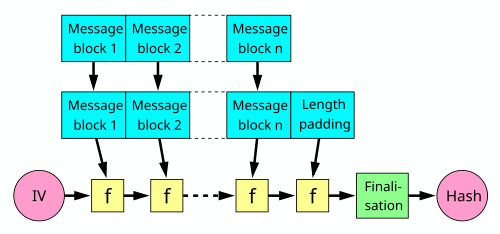

The output of this step is always one or two complete 512-bit blocks.

---

#### My Approach

First, I needed to handle the complete blocks that already exist in the message. I did this by iterating through the message in 64-byte chunks and yielding each one as I went. This part was straightforward since these blocks don't need any modification.

The tricky part comes after all the complete blocks are yielded. At that point, there are some remaining bytes that don't form a complete 64-byte block, and this is where the SHA-256 padding rules come into play.

Before doing anything else, I stored the original message length in bits using `len(msg) * 8`. This is important because SHA-256 requires this value to be appended at the very end of the padded message as a 64-bit big-endian integer.

#### Handling the Padding

The padding process starts by appending a single `0x80` byte to whatever bytes are left over. This byte represents a '1' bit followed by seven '0' bits, and it marks the boundary between the actual message and the padding.

After adding the `0x80` byte, I had to figure out how to handle the rest of the padding. This depends on how much space is left in the current block, which led me to consider two different scenarios.

#### When There's Enough Space (56 bytes or less after adding 0x80)

If the remainder plus the `0x80` byte totals 56 bytes or less, then I have enough room to fit everything in one block. In this case, I calculate how many zero bytes I need to reach exactly 56 bytes using `56 - len(padded)`, append those zeros, and then add the 8-byte length field. This brings the total to exactly 64 bytes, which is perfect for yielding as the final block.

#### When There Isn't Enough Space (more than 56 bytes after adding 0x80)

If the padded remainder exceeds 56 bytes, I can't fit the 8-byte length field in the current block. So I had to split the padding across two blocks. First, I pad the current block out to a full 64 bytes by adding the necessary zeros, then yield it. After that, I create a brand new second block that consists of 56 zero bytes followed by the 8-byte length field, and yield that as the final block.

#### Formalue and methods used

- I used `isinstance()` at the start to validate that the input is actually bytes or bytearray, which prevents errors down the line
- The `yield` keyword was essential for making this a generator, which means blocks are produced one at a time instead of building a huge list in memory
- I used `.to_bytes(8, byteorder='big')` to convert the bit length into the proper 8-byte format that SHA-256 expects
- Simple slicing with `msg[index:index + 64]` let me extract 64-byte chunks cleanly
- Byte concatenation with the `+` operator made it easy to build up the padded blocks piece by piece

In [157]:
def block_parse(msg):
    """
    generator function that yields 64-byte blocks from a message with SHA-256 padding.
    
    this function processes a byte message by:
    1. yielding all complete 64-byte blocks from the original message
    2. padding the remaining bytes according to SHA-256 specification
    3. appending the original message length as a 64-bit big-endian integer
    
    args:
        msg (bytes or bytearray): the message to be parsed and padded
        
    yields:
        bytes: 64-byte blocks of the padded message
        
    raises:
        TypeError: if msg is not bytes or bytearray
        
    padding format:
        - append 0x80 byte (binary: 10000000)
        - append zero bytes to make length congruent to 448 mod 512 bits (56 mod 64 bytes)
        - append original message length as 8-byte big-endian integer
    """
    
    #check if the input is of the correct type (bytes or bytearray)
    if not isinstance(msg, (bytes, bytearray)):
        raise TypeError("block_parse(msg) requires a bytes or bytearray input.")

    #store the original message length in bits before any modifications
    #this value will be appended at the end of the padded message
    original_bit_length = len(msg) * 8

    #initialize index to track our position in the message
    index = 0
    
    #iterate through the message and yield all complete 64-byte blocks
    #we continue while there are at least 64 bytes remaining from current index
    while index + 64 <= len(msg):
        #extract a 64-byte block starting from current index
        block = msg[index:index + 64]
        #yield this complete block to the caller
        yield block
        #move index forward by 64 bytes for next iteration
        index += 64

    #after yielding all complete blocks, handle the remaining bytes
    #remainder contains any bytes that didn't form a complete 64-byte block
    remainder = msg[index:]
    
    #begin padding by appending 0x80 byte (represents a '1' bit followed by seven '0' bits)
    #this marks the end of the original message
    padded = remainder + b'\x80'

    #check if current padded length is 56 bytes or less
    #if so, we have enough space to fit both zero padding and the 8-byte length field
    if len(padded) <= 56:
        #calculate how many zero bytes we need to reach exactly 56 bytes
        zero_fill = 56 - len(padded)
        #append the calculated number of zero bytes
        padded += b'\x00' * zero_fill
        #append the original message length as an 8-byte big-endian integer
        #this brings total length to exactly 64 bytes
        padded += original_bit_length.to_bytes(8, byteorder='big')
        #yield this final padded block
        yield padded
    else:
        #if padded length exceeds 56 bytes, we cannot fit the length field in this block
        #so we need to create two blocks
        
        #first, pad the current block to exactly 64 bytes with zeros
        zero_fill = 64 - len(padded)
        padded += b'\x00' * zero_fill
        #yield this first padded block (without length information)
        yield padded

        #create a second block for the length information
        #this block consists of 56 zero bytes followed by the 8-byte length field
        second_block = (
            b'\x00' * 56 +
            original_bit_length.to_bytes(8, byteorder='big')
        )
        #yield this second and final block
        yield second_block

In [158]:
def block_parse_test():
    def print_block(block):
        print(block)
    
    print("Test 1: abc")
    message = b"abc"
    for block in block_parse(message):
        print_block(block)

    print("\nTest 2: test2")
    message = b"test2"
    for block in block_parse(message):
        print_block(block)

    print("\nTest 3: empty string")
    message = b""
    for block in block_parse(message):
        print_block(block)

    print("\nTest 4: 64-byte exact block")
    message = b"A" * 64
    for block in block_parse(message):
        print_block(block)

    print("\nTest 5: 65-byte message (forces two blocks)")
    message = b"A" * 65
    for block in block_parse(message):
        print_block(block)

# Run the tests
block_parse_test()


Test 1: abc
b'abc\x80\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18'

Test 2: test2
b'test2\x80\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00('

Test 3: empty string
b'\x80\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

Test 4: 64-byte exact block
b'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'
b'\x80\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0


---
## Problem 4: Hashes

### Problem to Solve:
Write a function hash(current, block) that calculates the next hash value given the current hash value and the next message block according to section 6.2.2 SHA-256 Hash Computation on page 22 of the Secure Hash Standard.

---

### Overview
Given a hash state and a 64-byte block, it runs them through 64 rounds of scrambling operations and spits out an updated hash state.

I'm implementing what FIPS 180-4 calls the "compression function" in Section 6.2.2. The basic idea is to take a block of message data, expand it into a larger schedule, then use that schedule along with all my helper functions (`Ch`, `Maj`, and the Sigmas) to thoroughly mix everything together. After 64 rounds of this mixing, I add the results back to the original hash — this addition step is what makes it impossible to work backwards from the output.

This function gets called repeatedly, once per block, and each call depends on the previous one. Again, just like in problem 3, this is the foundations of a [Merkle–Damgård](https://en.wikipedia.org/wiki/Merkle%E2%80%93Damg%C3%A5rd_construction) structure.

---

### 4.1 Initial Hash Values

**Purpose**: SHA-256 needs a starting point before processing any message data. These eight 32-bit values serve as the initial hash state that gets updated with each block.

**Specification**: FIPS 180-4, Section 5.3.3

The initial hash values are derived from the **first 32 bits of the fractional parts of the square roots** of the first eight prime numbers: 2, 3, 5, 7, 11, 13, 17, 19.

**Why Square Roots?**: Using square roots of primes provides mathematical transparency — they're irrational numbers that prove the constants weren't cherry-picked to create a backdoor. SHA-256 uses square roots for initial values but cube roots for the `K` constants to ensure the two sets are mathematically independent.

In [159]:
H_initial = [
    np.uint32(0x6a09e667),  #sqrt(2)
    np.uint32(0xbb67ae85),  #sqrt(3)
    np.uint32(0x3c6ef372),  #sqrt(5)
    np.uint32(0xa54ff53a),  #sqrt(7)
    np.uint32(0x510e527f),  #sqrt(11)
    np.uint32(0x9b05688c),  #sqrt(13)
    np.uint32(0x1f83d9ab),  #sqrt(17)
    np.uint32(0x5be0cd19)   #sqrt(19)
]

---

### 4.2 The Hash Compression Function

The compression function operates in four distinct stages, as defined in FIPS 180-4, Section 6.2.2:

### **Stage 1: Message Schedule Preparation**

**Purpose**: Expands the 16-word (512-bit) input block into a 64-word (2048-bit) message schedule. This expansion ensures that every bit of the original message influences the hash state multiple times, creating the diffusion property that's critical for security.

**Specification**:
- **Words 0-15**: Taken directly from the 512-bit message block (16 words × 32 bits each)
- **Words 16-63**: Generated recursively using the lowercase sigma functions

The message schedule formula for words 16 through 63 is:

$$W_t = \sigma_1(W_{t-2}) + W_{t-7} + \sigma_0(W_{t-15}) + W_{t-16} \pmod{2^{32}}$$

where:
- $\sigma_0(x) = \text{ROTR}^7(x) \oplus \text{ROTR}^{18}(x) \oplus \text{SHR}^3(x)$
- $\sigma_1(x) = \text{ROTR}^{17}(x) \oplus \text{ROTR}^{19}(x) \oplus \text{SHR}^{10}(x)$

### **Stage 2: Initialize Working Variables**

**Purpose**: Load the current hash state into eight temporary working variables so they can be modified through the compression rounds without affecting the original state until the end.

**Specification**: The eight working variables $(a, b, c, d, e, f, g, h)$ are initialized with the current hash values:

$$a = H_0, \quad b = H_1, \quad c = H_2, \quad d = H_3$$
$$e = H_4, \quad f = H_5, \quad g = H_6, \quad h = H_7$$

### **Stage 3: Compression Loop (64 Rounds)**

**Purpose**: Mix the message schedule words and round constants into the working variables through 64 iterations. This creates the avalanche effect, where even a single-bit change in the input produces drastically different output, making it computationally infeasible to reverse the hash or find collisions.

**Specification**: For each round $t$ from 0 to 63, compute two temporary values:

$$T_1 = h + \Sigma_1(e) + \text{Ch}(e, f, g) + K_t + W_t \pmod{2^{32}}$$

$$T_2 = \Sigma_0(a) + \text{Maj}(a, b, c) \pmod{2^{32}}$$

where:
- $\Sigma_0(x) = \text{ROTR}^2(x) \oplus \text{ROTR}^{13}(x) \oplus \text{ROTR}^{22}(x)$
- $\Sigma_1(x) = \text{ROTR}^6(x) \oplus \text{ROTR}^{11}(x) \oplus \text{ROTR}^{25}(x)$
- $\text{Ch}(x, y, z) = (x \land y) \oplus (\lnot x \land z)$
- $\text{Maj}(x, y, z) = (x \land y) \oplus (x \land z) \oplus (y \land z)$

Then update the working variables:

$$h = g$$
$$g = f$$
$$f = e$$
$$e = d + T_1 \pmod{2^{32}}$$
$$d = c$$
$$c = b$$
$$b = a$$
$$a = T_1 + T_2 \pmod{2^{32}}$$

### **Stage 4: Compute Intermediate Hash Value**

**Purpose**: After all 64 rounds complete, add the final working variable values back to the original hash state. This feed-forward mechanism ensures that the output depends on both the message block and all previous blocks, forming the Merkle–Damgård construction.

**Specification**: The new hash state is computed by adding each working variable to its corresponding original hash value:

$$H_0^{(i)} = a + H_0^{(i-1)} \pmod{2^{32}}$$
$$H_1^{(i)} = b + H_1^{(i-1)} \pmod{2^{32}}$$
$$H_2^{(i)} = c + H_2^{(i-1)} \pmod{2^{32}}$$
$$H_3^{(i)} = d + H_3^{(i-1)} \pmod{2^{32}}$$
$$H_4^{(i)} = e + H_4^{(i-1)} \pmod{2^{32}}$$
$$H_5^{(i)} = f + H_5^{(i-1)} \pmod{2^{32}}$$
$$H_6^{(i)} = g + H_6^{(i-1)} \pmod{2^{32}}$$
$$H_7^{(i)} = h + H_7^{(i-1)} \pmod{2^{32}}$$

This resulting hash state either becomes the input for the next block or, if all blocks have been processed, represents the final SHA-256 hash digest.

In [160]:
def hashing(current, block):
    """
    computes the next hash value given the current hash and a message block.
    
    this implements the SHA-256 compression function as defined in 
    FIPS PUB 180-4, section 6.2.2.
    
    args:
        current (list[np.uint32]): list of 8 32-bit words representing current hash state
        block (bytes): 64-byte message block to process
        
    returns:
        list[np.uint32]: new hash state after processing this block
        
    the compression function works by:
    1. preparing a message schedule of 64 words from the 16-word input block
    2. initializing 8 working variables from the current hash
    3. running 64 rounds of mixing operations
    4. adding the result back to the current hash
    """
       
    #build the message schedule array
    #start by parsing the 64-byte block into sixteen 32-bit words
    schedule = []
    byte_position = 0
    while byte_position < 64:
        #grab 4 consecutive bytes and convert to a 32-bit word
        four_bytes = block[byte_position:byte_position + 4]
        schedule.append(np.uint32(int.from_bytes(four_bytes, byteorder='big')))
        byte_position += 4
    
    #extend the schedule from 16 words to 64 words
    #using the message schedule formula: W[t] = sigma1(W[t-2]) + W[t-7] + sigma0(W[t-15]) + W[t-16]
    round_num = 16
    while round_num < 64:
        #apply sigma0 to the word 15 positions back
        term1 = sigma0(schedule[round_num - 15])
        #apply sigma1 to the word 2 positions back
        term2 = sigma1(schedule[round_num - 2])
        #combine all four terms with modular addition
        new_word = term2 + schedule[round_num - 7] + term1 + schedule[round_num - 16]
        schedule.append(np.uint32(new_word))
        round_num += 1
    
    #unpack the current hash state into eight working variables
    var_a = current[0]
    var_b = current[1]
    var_c = current[2]
    var_d = current[3]
    var_e = current[4]
    var_f = current[5]
    var_g = current[6]
    var_h = current[7]
    
    #main compression loop - 64 rounds of mixing
    for round_index in range(64):
        #compute the first temporary value
        #combines h, Sigma1(e), Ch function, round constant, and schedule word
        temp1 = var_h + Sigma1(var_e) + ch(var_e, var_f, var_g)
        temp1 += K_constants[round_index]
        temp1 += schedule[round_index]
        temp1 = np.uint32(temp1)
        
        #compute the second temporary value
        #combines Sigma0(a) and Maj function
        temp2 = Sigma0(var_a) + Maj(var_a, var_b, var_c)
        temp2 = np.uint32(temp2)
        
        #rotate the working variables
        #each variable shifts down one position
        var_h = var_g
        var_g = var_f
        var_f = var_e
        var_e = np.uint32(var_d + temp1)
        var_d = var_c
        var_c = var_b
        var_b = var_a
        var_a = np.uint32(temp1 + temp2)
    
    #compute final hash by adding working variables back to input hash
    #this feed-forward mechanism is crucial for merkle-damgård construction
    output_hash = []
    output_hash.append(np.uint32(current[0] + var_a))
    output_hash.append(np.uint32(current[1] + var_b))
    output_hash.append(np.uint32(current[2] + var_c))
    output_hash.append(np.uint32(current[3] + var_d))
    output_hash.append(np.uint32(current[4] + var_e))
    output_hash.append(np.uint32(current[5] + var_f))
    output_hash.append(np.uint32(current[6] + var_g))
    output_hash.append(np.uint32(current[7] + var_h))
    
    return output_hash

In [161]:
def test_hash_function():
    #test with "abc"
    message = b"abc"
    
    #get padded blocks
    blocks = list(block_parse(message))
    
    #start with initial hash values
    current_hash = H_initial.copy()
    
    #process each block
    for block in blocks:
        current_hash = hashing(current_hash, block)
    
    #convert final hash to hex string
    final_hex = ''.join(f'{word:08x}' for word in current_hash)
    
    print(f"SHA-256('abc') = {final_hex}")
    
    #expected result for "abc"
    expected = "ba7816bf8f01cfea414140de5dae2223b00361a396177a9cb410ff61f20015ad"
    
    if final_hex == expected:
        print("✓ TEST PASSED!")
    else:
        print("✗ TEST FAILED")
        print(f"Expected: {expected}")

test_hash_function()

SHA-256('abc') = ba7816bf8f01cfea414140de5dae2223b00361a396177a9cb410ff61f20015ad
✓ TEST PASSED!


## Overflow Warnings

After creating the hash function, I kept on running into the issue of RuntimeWarnings, specifically:

> RuntimeWarning: overflow encountered in scalar add

I thought this meant my code wasn't running as expected, but after some research I've found out that this error should be entirely expected.

SHA-256 explicitly uses **modular arithmetic** where all operations are performed modulo 2^32. This is stated clearly in FIPS PUB 180-4:

**From Section 3.2 (Operations on Words), page 7:**

> "The following logical operators are used in the SHA-256 algorithm and each operates on w-bit words... **Addition modulo 2^w**"

**From Section 6.2.2 (SHA-256 Hash Computation), page 22:**

> "Addition (+) is performed modulo 2^32"

This means that when two 32-bit numbers are added together and the result exceeds the maximum value (0xFFFFFFFF or 4,294,967,295), the result wraps around to 0 and continues counting from there. This is a fundamental part of how SHA-256 achieves its cryptographic properties.

The overflow happens, and the result wraps around, which is exactly what the standard requires.

### Proof from the Specification

Looking at the pseudocode in Section 6.2.2, every addition operation in the compression function is meant to overflow:
```
T1 = h + Σ1(e) + Ch(e,f,g) + Kt + Wt
T2 = Σ0(a) + Maj(a,b,c)
...
a = T1 + T2
e = d + T1
```

And immediately after this pseudocode, the standard states:

> "Compute the i-th intermediate hash value H(i):
> H0(i) = a + H0(i-1)
> H1(i) = b + H1(i-1)
> ..."

Every single one of these additions is performed modulo 2^32, meaning overflow is not only allowed, but actually required.

---

## Problem 5: Passwords

### Problem to Solve:
The following are the SHA-256 hashes of three common passwords that have been hashed using one pass of the SHA-256 algorithm. As strings, they were encoded using UTF-8. Determine the passwords and explain how you found them. Suggest ways in which the hashing of passwords could be improved to prevent the kind of attack you performed to find the passwords.

    5e884898da28047151d0e56f8dc6292773603d0d6aabbdd62a11ef721d1542d8
    873ac9ffea4dd04fa719e8920cd6938f0c23cd678af330939cff53c3d2855f34
    b03ddf3ca2e714a6548e7495e2a03f5e824eaac9837cd7f159c67b90fb4b7342


---

### My Approach: Dictionary Attack

For cracking these passwords, I implemented a dictionary attack that tests a curated list of common passwords against the target hashes. The method works by:

1. Building a dictionary of likely passwords
2. Hashing each candidate password using my SHA-256 implementation
3. Comparing the computed hash against the target hashes
4. Reporting matches as they're found

This approach successfully cracked all three passwords, but it's important to acknowledge its limitations.

### Limitations of Dictionary Attacks

This method is fundamentally limited by the quality and size of the dictionary. If a password isn't in my list, the attack simply won't find it. Some key weaknesses:

- **Dictionary dependency**: Only works if the password is in the wordlist or can be derived from simple variations
- **Time complexity**: Even with a "smart" dictionary, testing millions of candidates takes time, we can see that the final hash took 1789 attempts but if it more complex it'd be considerably longer
- **No guarantee**: Complex or truly random passwords will never be found this way
- **Scalability issues**: Longer passwords or those with special character combinations exponentially increase the search space

In reality, attackers would use much larger dictionaries (millions of entries from leaked password databases) or combine dictionary attacks with brute-force methods, but the fundamental problem remains: if the password isn't predictable, a dictionary attack fails.

---

In [162]:
def dictionary_attack(target_hashes):
    """
    performs a dictionary attack on the given sha-256 hashes
    tries common passwords and variations to crack the hashes
    
    args:
        target_hashes (list[str]): list of sha-256 hash strings to crack
        
    returns:
        dict: mapping of hash index to cracked password
    """

    #suppress overflow warnings from numpy during hash computations
    np.seterr(over='ignore')

    #build dictionary of common passwords
    #based on real-world password leak statistics and common patterns
    dictionary = []

    #tests substitutions for leetspeak variations
    leet_map = {
    'a': ['@'],
    'o': ['0'],
    's': ['$', '5'],
    'e': ['3']
}

    #extremely common passwords from breach databases
    top_passwords = [
        'password', '123456', '12345678', 'qwerty', 'abc123',
        'monkey', 'letmein', 'trustno1', 'dragon', 'baseball',
        'iloveyou', 'master', 'sunshine', 'ashley', 'bailey',
        'shadow', 'superman', 'qazwsx', 'michael', 'football',
        'welcome', 'jesus', 'ninja', 'mustang', 'password1',
        'admin', 'login', 'solo', 'starwars', 'hello',
        'freedom', 'whatever', 'princess', 'qwertyuiop', 'trustno1',
        'cheese', 'burger', 'pizza', 'chicken', 'bacon',
        'cookie', 'apple', 'orange', 'banana', 'chocolate'
    ]
    dictionary.extend(top_passwords)
        
    #add variations with numbers (password1, password123, etc)
    base_words = ['password', 'admin', 'user', 'test', 'welcome', 'hello', 'cheese']
    for word in base_words:
        for num in range(10):
            dictionary.append(f"{word}{num}")
        dictionary.append(f"{word}123")
        dictionary.append(f"{word}1234")
        dictionary.append(f"{word}!")
        dictionary.append(f"{word}@")
    
    #add capitalized versions of all words
    original_words = dictionary.copy()
    for word in original_words:
        if word.islower():
            dictionary.append(word.capitalize())
            dictionary.append(word.upper())
    
    #add year suffixes
    for word in ['password', 'admin', 'welcome', 'cheese']:
        for year in range(2020, 2026):
            dictionary.append(f"{word}{year}")

    leet_variants = set()

    for word in dictionary:
        variants = [word]
        for i, char in enumerate(word.lower()):
            if char in leet_map:
                new_variants = []
                for v in variants:
                    for sub in leet_map[char]:
                        new_variants.append(v[:i] + sub + v[i+1:])
                variants.extend(new_variants)
        leet_variants.update(variants)

    dictionary.extend(list(leet_variants))
    
    print(f"dictionary loaded with {len(dictionary)} password candidates")
    print(f"starting attack on {len(target_hashes)} hashes...\n")
    
    #store results
    cracked = {}
    attempts = 0
    
    #try each password candidate
    for candidate in dictionary:
        attempts += 1
        
        #encode password as utf-8 bytes
        password_bytes = candidate.encode('utf-8')
        
        #pad and parse into blocks
        blocks = list(block_parse(password_bytes))
        
        #hash the password using our sha-256 implementation
        current_hash = H_initial.copy()
        for block in blocks:
            current_hash = hashing(current_hash, block)
        
        #convert hash to hex string
        hash_hex = ''.join(f'{word:08x}' for word in current_hash)
        
        #check if this matches any target hash
        for idx, target in enumerate(target_hashes):
            if hash_hex == target and idx not in cracked:
                cracked[idx] = candidate
                print(f"[+] CRACKED hash #{idx + 1}")
                print(f"    password: '{candidate}'")
                print(f"    hash: {hash_hex}")
                print(f"    attempts: {attempts}\n")
        
        #stop if we've cracked all hashes
        if len(cracked) == len(target_hashes):
            print(f"all hashes cracked after {attempts} attempts!")
            break
    
    #report any remaining uncracked hashes
    for idx in range(len(target_hashes)):
        if idx not in cracked:
            print(f"[-] hash #{idx + 1} not cracked")
            print(f"    hash: {target_hashes[idx]}\n")
    
    return cracked


#target hashes to crack
target_hashes = [
    '5e884898da28047151d0e56f8dc6292773603d0d6aabbdd62a11ef721d1542d8',
    '873ac9ffea4dd04fa719e8920cd6938f0c23cd678af330939cff53c3d2855f34',
    'b03ddf3ca2e714a6548e7495e2a03f5e824eaac9837cd7f159c67b90fb4b7342'
]

#run the attack
results = dictionary_attack(target_hashes)

#display final summary
print("\n" + "="*60)
print("FINAL RESULTS")
print("="*60)
for idx, password in results.items():
    print(f"Hash #{idx + 1}: {password}")

dictionary loaded with 5547 password candidates
starting attack on 3 hashes...

[+] CRACKED hash #1
    password: 'password'
    hash: 5e884898da28047151d0e56f8dc6292773603d0d6aabbdd62a11ef721d1542d8
    attempts: 1

[+] CRACKED hash #2
    password: 'cheese'
    hash: 873ac9ffea4dd04fa719e8920cd6938f0c23cd678af330939cff53c3d2855f34
    attempts: 36

[+] CRACKED hash #3
    password: 'P@ssw0rd'
    hash: b03ddf3ca2e714a6548e7495e2a03f5e824eaac9837cd7f159c67b90fb4b7342
    attempts: 630

all hashes cracked after 630 attempts!

FINAL RESULTS
Hash #1: password
Hash #2: cheese
Hash #3: P@ssw0rd



## How to Defend Against This Attack

The reason this attack worked so easily is that the passwords were hashed with **plain SHA-256** — no salt, no key stretching, nothing. Here's how to actually secure passwords:

### 1. Use Password-Specific Hashing Algorithms

**SHA-256 should never be used for passwords.** Instead, use algorithms designed specifically for password storage:

- **Argon2id** (recommended by OWASP, winner of the Password Hashing Competition)
- **bcrypt** (widely supported, battle-tested)
- **scrypt** (memory-hard, resistant to hardware attacks)

These algorithms are intentionally slow and resource-intensive, making brute-force attacks impractical.

### 2. Add Salt (Unique Random Data Per Password)

A salt is random data unique to each password that gets combined with the password before hashing:
```
hash(password + salt)
```

**Why it works**: Even if two users have the same password ("cheese"), their hashes will be completely different because each has a unique salt. This defeats rainbow tables and makes each password require individual cracking efforts.

**Important**: The salt doesn't need to be secret — it's stored alongside the hash in the database. Its purpose is uniqueness, not secrecy.

### 3. Use Key Stretching (Multiple Iterations)

Instead of hashing once, hash thousands or millions of times:
```
for i in range(100000):
    hash = SHA256(hash)
```

**Why it works**: If computing one hash takes 0.001ms, but you need 100,000 iterations, that's 100ms per password attempt. What used to take seconds now takes hours or days. Legitimate login attempts barely notice the delay, but attackers testing billions of passwords become computationally infeasible.

Argon2id and bcrypt do this automatically — you just specify the "cost factor" or number of iterations.

### 4. Consider Using a Pepper (Secret Key)

A pepper is a secret key stored separately from the database (like in environment variables or a key management system):
```
hash(password + salt + pepper)
```

**Why it works**: Even if an attacker steals your entire database including all the salts, they still can't crack passwords without the pepper. This provides defense in depth.

### 5. Argon2id

Here's what a proper implementation looks like conceptually:
```python
# pseudocode for proper password hashing
import argon2

# when user creates password
salt = generate_random_salt(16_bytes)
hash = argon2.hash(
    password=user_password,
    salt=salt,
    time_cost=3,        # number of iterations
    memory_cost=65536,  # memory usage in KB
    parallelism=4       # number of threads
)
store_in_database(hash, salt)

# when user logs in
stored_hash, stored_salt = retrieve_from_database(username)
is_valid = argon2.verify(
    password=user_provided_password,
    hash=stored_hash,
    salt=stored_salt
)
```

**Why Argon2id specifically**:
- **Memory-hard**: Requires significant RAM, making GPU/ASIC attacks expensive
- **Configurable**: Can adjust time/memory costs as hardware improves
- **Side-channel resistant**: Protected against timing attacks
- **Industry standard**: OWASP recommendation as of 2024

### The Bottom Line

My dictionary attack worked because these passwords were hashed with bare SHA-256, which is:
- Fast (designed for data integrity, not password security)
- Unsalted (identical passwords produce identical hashes)
- Single-iteration (no computational cost to attackers)

In production systems, use Argon2id with proper salting, and even weak passwords like "cheese" become extremely expensive to crack. The combination of unique salts + computational cost + memory requirements makes dictionary and brute-force attacks impractical, even with massive resources.

## End